In [1]:
import pandas as pd
import numpy as np

In [2]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [3]:
# To make it clear when you are accessing by label or by integer location, 
# it is recommended to always use the loc attribute when accessing by label, and the iloc attribute when accessing by integer location:

In [4]:
s2.iloc[1]

83

In [5]:
s2.loc['bob']

83

In [6]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

In [7]:
# But remember that you can access elements by integer location using the iloc attribute. 
# This illustrates another reason why it's always better to use loc and iloc to access Series objects

In [8]:
# You can create a Series object from a dict. The keys will be used as index labels:

In [9]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [10]:
print(s2.keys())
print(s3.keys())
# Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items.
# But if you forget to set the right index labels, you can have surprising results
s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [11]:
# A Series can have a name
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

In [12]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [13]:
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]

In [14]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

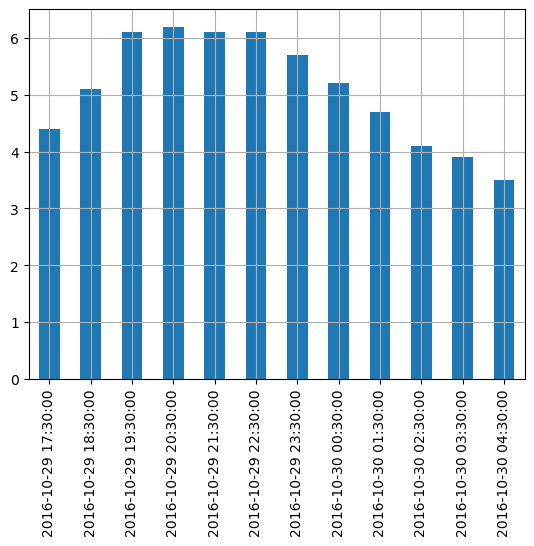

In [15]:
temp_series.plot(kind="bar")

import matplotlib.pyplot as plt

plt.grid(True)
plt.show()

In [16]:
# Pandas lets us resample a time series very simply. Just call the resample() method and specify a new frequency:

In [17]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

In [18]:
temp_series_freq_2H?

Type:            DatetimeIndexResampler
String form:     DatetimeIndexResampler [freq=<2 * Hours>, axis=0, closed=left, label=left, convention=start, origin=start_day]
Length:          7
File:            d:\anaconda\envs\homl3\lib\site-packages\pandas\core\resample.py
Docstring:       <no docstring>
Class docstring:
Class for resampling datetimelike data, a groupby-like operation.
See aggregate, transform, and apply functions on this object.

It's easiest to use obj.resample(...) to use Resampler.

Parameters
----------
obj : Series or DataFrame
groupby : TimeGrouper
axis : int, default 0
kind : str or None
    'period', 'timestamp' to override default index treatment

Returns
-------
a Resampler of the appropriate type

Notes
-----
After resampling, see aggregate, apply, and transform functions.

In [19]:
temp_series_freq_2H = temp_series_freq_2H.mean()

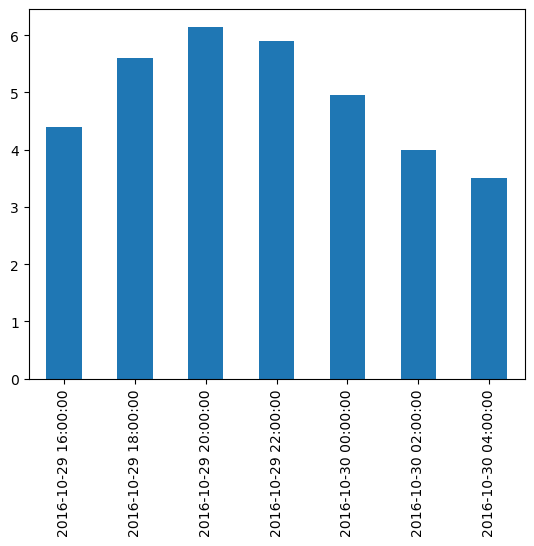

In [20]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

In [21]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [23]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

In [24]:
# One solution is to fill the gaps by interpolating. We just call the interpolate() method. 
# The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [25]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

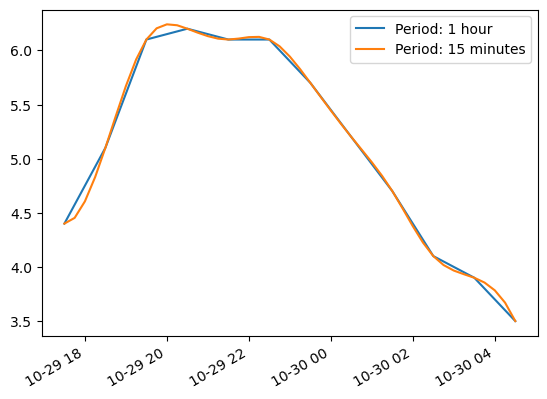

In [26]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

In [28]:
# By default, datetimes are naive: they are not aware of timezones, so 2016-10-30 02:30 might mean October 30th 2016 at 2:30am in Paris or in New York. 
# We can make datetimes timezone aware by calling the tz_localize() method:

In [29]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
dtype: float64

In [30]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

# DataFrame objects

In [31]:
# You can create a DataFrame by passing a dictionary of Series objects:

In [32]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [33]:
# You can access columns pretty much as you would expect. They are returned as Series objects:

In [34]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [35]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [36]:
# Another convenient way to create a DataFrame is to pass all the values to the constructor as an ndarray, 
# or a list of lists, and specify the column names and row index labels separately:

In [37]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [38]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3.0


In [40]:
# It is also possible to create a DataFrame with a dictionary (or list) of dictionaries (or lists):

In [41]:
people = pd.DataFrame({
    "birthyear": {"alice": 1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice": "Biking", "bob": "Dancing"},
    "weight": {"alice": 68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [42]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"): 1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"): "Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"): 68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"): np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [43]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [44]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

In [45]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

In [46]:
# As you may have noticed, the stack() and unstack() methods do not modify the object they are called on. 
# Instead, they work on a copy and return that copy. This is true of most methods in pandas.

In [47]:
# The loc attribute lets you access rows instead of columns. 
# The result is a Series object in which the DataFrame's column names are mapped to row index labels:

In [48]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [49]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [51]:
# Finally, you can pass a boolean array to get the matching rows

In [52]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [53]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


In [54]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [55]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [56]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30
alice,Biking,172,68,33,True
bob,Dancing,181,83,34,True
charles,NaN,185,112,26,False


In [57]:
# You can also create new columns by calling the assign() method. 
# Note that this returns a new DataFrame object, the original is not modified:

In [59]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene": 1})  # alice is missing, eugene is ignored
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


In [60]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [61]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


In [62]:
# But fear not, there is a simple solution. You can pass a function to the assign() method (typically a lambda function), 
# and this function will be called with the DataFrame as a parameter:

In [63]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


In [64]:
# A great feature supported by pandas is expression evaluation. It relies on the numexpr library which must be installed.

In [65]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

In [66]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,33,True,NaN,22.985398
bob,Dancing,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


In [67]:
# You can use a local or global variable in an expression by prefixing it with '@':

In [68]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [69]:
# The query() method lets you filter a DataFrame based on a query expression:

In [70]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


In [73]:
people["pets"] == 0

alice      False
bob         True
charles    False
Name: pets, dtype: bool

In [75]:
people["age"] > 30

alice       True
bob         True
charles    False
Name: age, dtype: bool

In [76]:
people[(people["age"]>30) & (people["pets"] == 0)]

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


In [77]:
# You can sort a DataFrame by calling its sort_index method.
# By default, it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [78]:
people.sort_index(ascending = False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
alice,Biking,172,68,33,True,NaN,22.985398,False


In [79]:
# Note that sort_index returned a sorted copy of the DataFrame. 
# To modify people directly, we can set the inplace argument to True. Also, we can sort the columns instead of the rows by setting axis=1

In [80]:
people.sort_index(axis=1,inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


In [82]:
people.sort_values(by="body_mass_index",inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


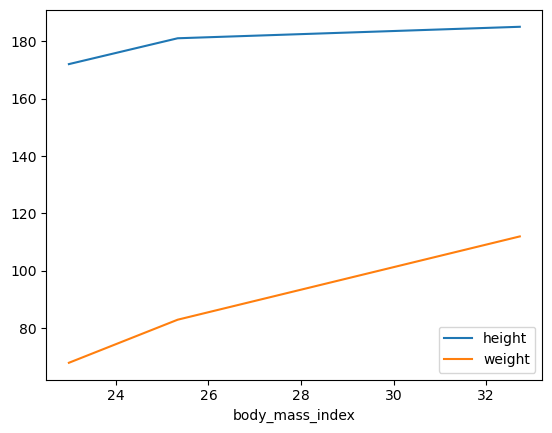

In [83]:
people.plot(kind="line",x="body_mass_index",y=["height","weight"])
plt.show()

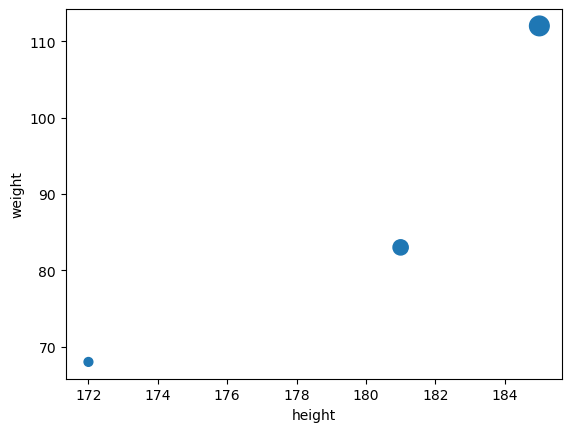

In [84]:
people.plot(kind="scatter", x="height", y="weight", s=[40, 120, 200])
plt.show()

In [85]:
bonus_array = np.array([[0, np.nan, 2], 
                        [np.nan, 1, 0], 
                        [0, 1, 0], 
                        [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob", "colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [87]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice", "bob", "charles", "darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [88]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [89]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [90]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [91]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [92]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby", "weight", "birthyear", "children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


# Saving

In [93]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

In [94]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()

# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



In [95]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [97]:
us_cities = None
try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

,State,Population,lat,lon
City,,,,
Marysville,Washington,63269,48.051764,-122.177082
Perris,California,72326,33.782519,-117.228648
Cleveland,Ohio,390113,41.499320,-81.694361
Worcester,Massachusetts,182544,42.262593,-71.802293
Columbia,South Carolina,133358,34.000710,-81.034814


In [99]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    n

In [100]:
us_cities = None
try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814
